<a href="https://colab.research.google.com/github/tewei0328/trade-backtest/blob/main/5-ta/ta_yfinance_top4_ta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Top 4 Python libraries for technical analysis
https://github.com/erykml/medium_articles/blob/master/Quantitative%20Finance/technical_analysis_libraries.ipynb

In [1]:
!pip install ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29103 sha256=71cba9cfc66bf15a3f6f752f5e6929a7ee2cb51e8e0fedf7064ab25e19e689cc
  Stored in directory: /root/.cache/pip/wheels/47/51/06/380dc516ea78621870b93ff65527c251afdfdc5fa9d7f4d248
Successfully built ta


In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

#import talib
import ta
#import pandas_ta as pta
#from finta import TA

plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = [14, 8]

<ipython-input-2-f48b4cb740f2>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


[*********************100%***********************]  1 of 1 completed


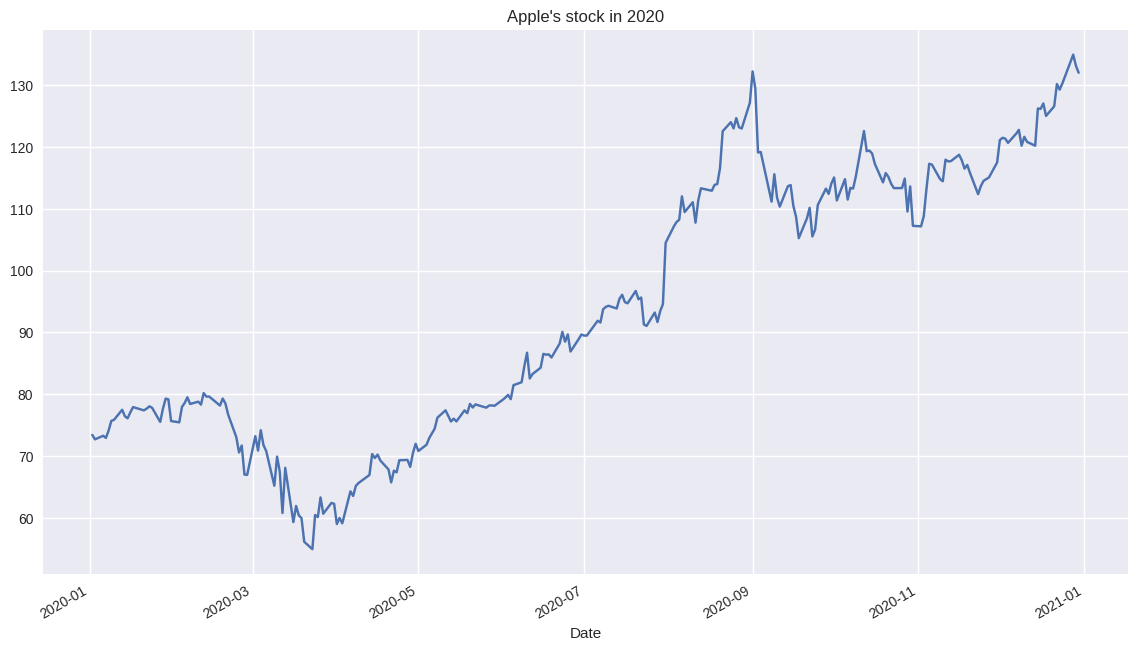

In [3]:
df = yf.download("AAPL", 
                 start="2020-01-01", 
                 end="2020-12-31")

df["Adj Close"].plot(title="Apple's stock in 2020");

In [4]:
help(ta.volatility.BollingerBands)

Help on class BollingerBands in module ta.volatility:

class BollingerBands(ta.utils.IndicatorMixin)
 |  BollingerBands(close: pandas.core.series.Series, window: int = 20, window_dev: int = 2, fillna: bool = False)
 |  
 |  Bollinger Bands
 |  
 |  https://school.stockcharts.com/doku.php?id=technical_indicators:bollinger_bands
 |  
 |  Args:
 |      close(pandas.Series): dataset 'Close' column.
 |      window(int): n period.
 |      window_dev(int): n factor standard deviation
 |      fillna(bool): if True, fill nan values.
 |  
 |  Method resolution order:
 |      BollingerBands
 |      ta.utils.IndicatorMixin
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, close: pandas.core.series.Series, window: int = 20, window_dev: int = 2, fillna: bool = False)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  bollinger_hband(self) -> pandas.core.series.Series
 |      Bollinger Channel High Band
 |      
 |      Returns:
 |          pa

In [5]:
# instantiate the indicator
ta_bbands = ta.volatility.BollingerBands(close=df["Adj Close"], 
                                         window=20, 
                                         window_dev=2)

# copy as we will be adding to it temporarily
ta_df = df.copy()

# add Bollinger Bands
ta_df["bb_ma"] = ta_bbands.bollinger_mavg()
ta_df["bb_high"] = ta_bbands.bollinger_hband()
ta_df["bb_low"] = ta_bbands.bollinger_lband()

# add Bollinger Bands low/high indicator
ta_df["bb_high_ind"] = ta_bbands.bollinger_hband_indicator()
ta_df["bb_low_ind"] = ta_bbands.bollinger_lband_indicator()

# add additional measures
ta_df["bb_width"] = ta_bbands.bollinger_wband()
ta_df["bb_pct"] = ta_bbands.bollinger_pband()

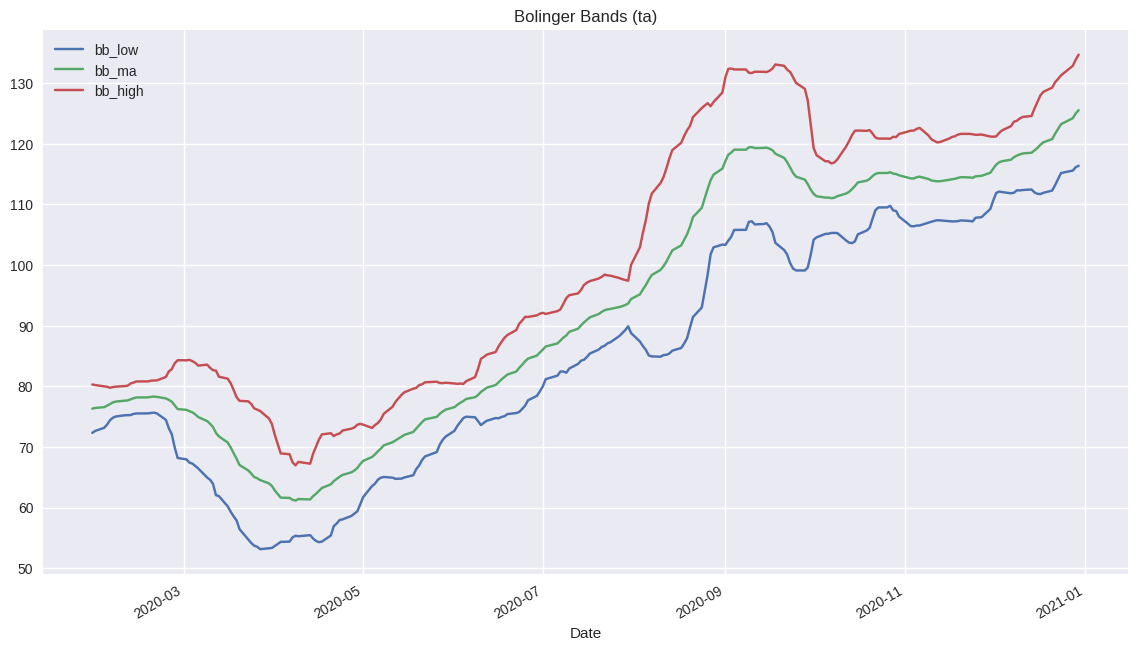

In [6]:
ta_df[["bb_low", "bb_ma", "bb_high"]].plot(title="Bolinger Bands (ta)");

In [7]:
ta_df

,Open,High,Low,Close,Adj Close,Volume,bb_ma,bb_high,bb_low,bb_high_ind,bb_low_ind,bb_width,bb_pct
Date,,,,,,,,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.449387,135480400,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.735313,146322800,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.314888,118387200,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.970093,108872000,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.143898,132079200,NaN,NaN,NaN,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,132.160004,132.429993,130.779999,130.960007,129.209274,88223700,122.446905,130.698268,114.195542,0.0,0.0,13.477454,0.909773
2020-12-24,131.320007,133.460007,131.100006,131.970001,130.205765,54930100,123.233250,131.292635,115.173865,0.0,0.0,13.079887,0.932571
2020-12-28,133.990005,137.339996,133.509995,136.690002,134.862701,124486200,124.224817,132.862845,115.586788,1.0,0.0,13.907090,1.115759
